# Using the model and best-fit parameters from CenQue, we measure the following values:
The "true" SF fraction
$$f_{True SF}(\mathcal{M}_*)$$

The "true" SF SMF
$$\Phi_{True SF}(\mathcal{M}_*)$$

In [55]:
import numpy as np 
import pickle
import util as UT
import observables as Obvs
from scipy.interpolate import interp1d
# plotting
import matplotlib.pyplot as plt
%matplotlib inline
from ChangTools.plotting import prettyplot
from ChangTools.plotting import prettycolors

In [2]:
prettyplot()
pretty_colors = prettycolors()

## import output from CenQue model with best-fit parameters

$$ F_{cenque} ({\bf \theta_{best-fit}}) $$


In [9]:
cenque = pickle.load(open(''.join([UT.dat_dir(), 'Descendant.ABC_posterior.RHOssfrfq_TinkerFq_Std.updated_prior.p']), 'rb'))

In [10]:
print cenque.keys()
for k in cenque.keys(): 
    if cenque[k] is not None: 
        print k
        print cenque[k][:10]

['t_quench', 'quenched', 'sfr_class', 'sfr', 'mass', 'sham_mass', 'halo_mass', 'ssfr', 'gal_type']
t_quench
[  12.45486937  999.           12.78196255  999.          999.          999.
  999.          999.          999.          999.        ]
quenched
[0 0 0 0 0 0 0 0 0 0]
sfr_class
['quiescent' 'star-forming' 'quiescent' 'star-forming' 'star-forming'
 'star-forming' 'star-forming' 'star-forming' 'star-forming' 'star-forming']
sfr
[-0.43487979 -1.89122474 -0.2471175  -1.69143443 -1.20001857 -1.21875458
 -0.49085328 -0.66988371 -0.56843078 -0.77496214]
mass
[  9.78588867   7.72811699  10.52382469   7.77867794   8.11984444
   8.61879349  10.26619911   9.27050591   9.2674427    9.11982822]
halo_mass
[ 11.69618893  10.57685661  12.53023911  10.79275322  10.76711559
  10.96514034  11.54843426  11.19728184  11.24716091  11.19564438]
ssfr
[-10.22076847  -9.61934173 -10.77094219  -9.47011237  -9.31986301
  -9.83754807 -10.7570524   -9.94038961  -9.83587348  -9.89479037]


In [28]:
print cenque['sfr_class'][np.where(cenque['quenched'] != 0)]
print cenque['t_quench'][np.where(cenque['quenched'] != 0)]
print cenque['t_quench'][np.where((cenque['quenched'] != 0) & (cenque['sfr_class'] == 'star-forming'))]

['quiescent' 'quiescent' 'quiescent' ..., 'quiescent' 'quiescent'
 'quiescent']
[ 8.30266693  5.88093758  6.07194362 ...,  6.28075036  7.36811249
  7.2392411 ]
[ 999.  999.  999.  999.  999.  999.  999.  999.  999.  999.  999.  999.
  999.  999.  999.  999.  999.  999.  999.  999.  999.  999.  999.  999.
  999.  999.  999.  999.  999.  999.  999.  999.  999.  999.  999.  999.
  999.  999.  999.  999.  999.  999.  999.  999.  999.  999.  999.  999.
  999.  999.  999.  999.  999.  999.  999.  999.  999.  999.  999.  999.
  999.  999.  999.  999.  999.  999.  999.  999.  999.  999.  999.  999.
  999.  999.  999.  999.  999.  999.  999.  999.  999.  999.  999.  999.
  999.  999.  999.  999.  999.  999.  999.  999.  999.  999.  999.  999.
  999.  999.  999.  999.  999.  999.  999.  999.  999.  999.  999.  999.
  999.  999.  999.  999.  999.  999.  999.  999.  999.  999.  999.  999.
  999.  999.  999.  999.  999.  999.  999.  999.  999.  999.  999.  999.
  999.  999.  999.  999.  999.  999. 

In [31]:
# Star-forming only
isSF = np.where((cenque['sfr_class'] == 'star-forming') & (cenque['quenched'] == 0))

# quenching 
#isQing = np.where((cenque['quenched'] == 0) & (cenque['t_quench'] != 999))
isQing = np.where((cenque['quenched'] == 0) & (cenque['sfr_class'] == 'quiescent'))

# quiescent
isQ = np.where(cenque['quenched'] != 0)

assert len(cenque['sfr_class']) == len(isSF[0]) + len(isQing[0]) + len(isQ[0])

# Lets examine SSFRs of each galaxy class

In [40]:
esef = Obvs.Ssfr()

bin_pssfr_tot, pssfr_tot = esef.Calculate(cenque['mass'], cenque['ssfr'])

bin_pssfr_sf, pssfr_sf = esef.Calculate(cenque['mass'][isSF], cenque['ssfr'][isSF])

bin_pssfr_qing, pssfr_qing = esef.Calculate(cenque['mass'][isQing], cenque['ssfr'][isQing])

bin_pssfr_q, pssfr_q = esef.Calculate(cenque['mass'][isQ], cenque['ssfr'][isQ])

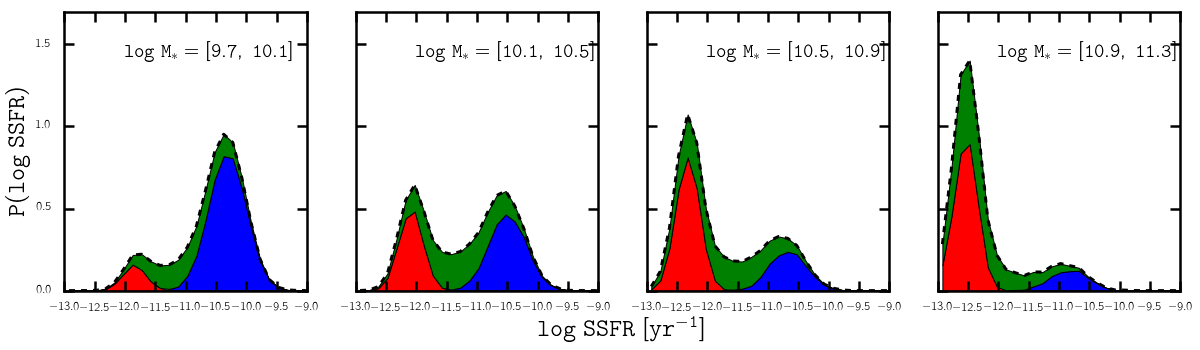

In [42]:
fig = plt.figure(figsize=(20, 5))
bkgd = fig.add_subplot(111, frameon=False)

for i_m, mass_bin in enumerate(esef.mass_bins): 
    sub = fig.add_subplot(1, 4, i_m+1)

    in_mbin = (cenque['mass'] >= mass_bin[0]) & (cenque['mass'] < mass_bin[1])
    also_sf = (cenque['sfr_class'] == 'star-forming') & (cenque['quenched'] == 0)
    also_q = cenque['quenched'] != 0
    also_qing = (cenque['quenched'] == 0) & (cenque['sfr_class'] == 'quiescent')
    
    N_tot = np.float(len(np.where(in_mbin)[0]))
    f_sf = np.float(len(np.where(in_mbin & also_sf)[0])) / N_tot
    f_q = np.float(len(np.where(in_mbin & also_q)[0])) / N_tot
    f_qing = np.float(len(np.where(in_mbin & also_qing)[0])) / N_tot  
    assert f_sf + f_q + f_qing == 1.
    
    # Star-forming
    sub.fill_between(bin_pssfr_sf[i_m], f_sf * pssfr_sf[i_m], np.repeat(0., len(bin_pssfr_sf[i_m])), 
                     color='b', edgecolor=None)
    # Quiescent
    sub.fill_between(bin_pssfr_q[i_m], f_q * pssfr_q[i_m], np.repeat(0., len(bin_pssfr_q[i_m])), 
                     color='r', edgecolor=None)
    # quienching
    sub.fill_between(bin_pssfr_qing[i_m], f_qing * pssfr_qing[i_m] + f_q * pssfr_q[i_m] + f_sf * pssfr_sf[i_m], 
                     f_q * pssfr_q[i_m] + f_sf * pssfr_sf[i_m], 
                     color='g', edgecolor=None)
    
    sub.plot(bin_pssfr_tot[i_m], pssfr_tot[i_m], color='k', lw=3, ls='--')
    
    massbin_str = ''.join([r'$\mathtt{log \; M_{*} = [', 
                           str(mass_bin[0]), ',\;', str(mass_bin[1]), ']}$'])
    sub.text(-12., 1.4, massbin_str, fontsize=20)
        
    # x-axis
    sub.set_xlim([-13., -9.])
    # y-axis 
    sub.set_ylim([0.0, 1.7])
    sub.set_yticks([0.0, 0.5, 1.0, 1.5])
    if i_m == 0: 
        sub.set_ylabel(r'$\mathtt{P(log \; SSFR)}$', fontsize=25) 
    else: 
        sub.set_yticklabels([])
bkgd.tick_params(labelcolor='none', top='off', bottom='off', left='off', right='off')
bkgd.set_xlabel(r'$\mathtt{log \; SSFR \;[yr^{-1}]}$', fontsize=25) 
plt.show()

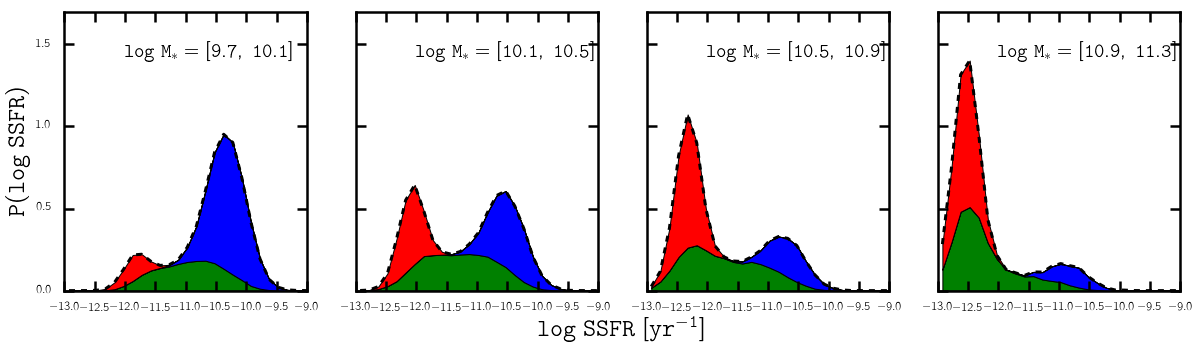

In [69]:
fig = plt.figure(figsize=(20, 5))
bkgd = fig.add_subplot(111, frameon=False)

for i_m, mass_bin in enumerate(esef.mass_bins): 
    sub = fig.add_subplot(1, 4, i_m+1)

    in_mbin = (cenque['mass'] >= mass_bin[0]) & (cenque['mass'] < mass_bin[1])
    also_sf = (cenque['sfr_class'] == 'star-forming') & (cenque['quenched'] == 0)
    also_q = cenque['quenched'] != 0
    also_qing = (cenque['quenched'] == 0) & (cenque['sfr_class'] == 'quiescent')
    
    N_tot = np.float(len(np.where(in_mbin)[0]))
    f_sf = np.float(len(np.where(in_mbin & also_sf)[0])) / N_tot
    f_q = np.float(len(np.where(in_mbin & also_q)[0])) / N_tot
    f_qing = np.float(len(np.where(in_mbin & also_qing)[0])) / N_tot  
    assert f_sf + f_q + f_qing == 1.
    
    # quienching
    sub.fill_between(bin_pssfr_qing[i_m], f_qing * pssfr_qing[i_m], np.zeros(len(bin_pssfr_qing[i_m])), 
                     color='g', edgecolor=None)
    
    # Star-forming
    sub.fill_between(bin_pssfr_sf[i_m], f_sf * pssfr_sf[i_m] + f_qing * pssfr_qing[i_m], f_qing * pssfr_qing[i_m], 
                     color='b', edgecolor=None)
    # Quiescent
    sub.fill_between(bin_pssfr_q[i_m], f_q * pssfr_q[i_m] +  f_sf * pssfr_sf[i_m] + f_qing * pssfr_qing[i_m], 
                     f_sf * pssfr_sf[i_m] + f_qing * pssfr_qing[i_m], 
                     color='r', edgecolor=None)
    
    sub.plot(bin_pssfr_tot[i_m], pssfr_tot[i_m], color='k', lw=3, ls='--')
    
    massbin_str = ''.join([r'$\mathtt{log \; M_{*} = [', 
                           str(mass_bin[0]), ',\;', str(mass_bin[1]), ']}$'])
    sub.text(-12., 1.4, massbin_str, fontsize=20)
        
    # x-axis
    sub.set_xlim([-13., -9.])
    # y-axis 
    sub.set_ylim([0.0, 1.7])
    sub.set_yticks([0.0, 0.5, 1.0, 1.5])
    if i_m == 0: 
        sub.set_ylabel(r'$\mathtt{P(log \; SSFR)}$', fontsize=25) 
    else: 
        sub.set_yticklabels([])
bkgd.tick_params(labelcolor='none', top='off', bottom='off', left='off', right='off')
bkgd.set_xlabel(r'$\mathtt{log \; SSFR \;[yr^{-1}]}$', fontsize=25) 
plt.show()

## Calculate $f_{True SF}$

In [45]:
effq = Obvs.Fq()
theta_sfms = {'name': 'linear', 'zslope': 1.14}

In [46]:
qf = effq.Calculate(mass=cenque['mass'], sfr=cenque['sfr'], z=UT.z_nsnap(1), theta_SFMS=theta_sfms)

In [49]:
# calculate true SF fraction 
m_low = np.arange(8.0, 12.0, 0.1)
m_high = m_low + 0.1

m_mid, f_truesf = np.zeros(len(m_low)), np.zeros(len(m_low))

also_sf = (cenque['sfr_class'] == 'star-forming') & (cenque['quenched'] == 0)
for i_m in range(len(m_low)): 
    in_mbin = (cenque['mass'] >= m_low[i_m]) & (cenque['mass'] < m_high[i_m])
    
    N_tot = np.float(len(np.where(in_mbin)[0]))
    N_sf = np.float(len(np.where(in_mbin & also_sf)[0]))
    
    m_mid[i_m] = 0.5 * (m_low[i_m] + m_high[i_m]) 
    f_truesf[i_m] = N_sf/N_tot

### Comparison of $f_{SF} = 1 - f_Q$ versus $f_{True SF}$

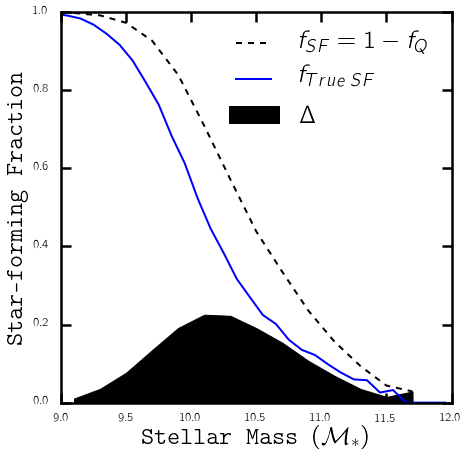

In [61]:
fig = plt.figure(figsize=(7,7))
sub = fig.add_subplot(111)

sub.plot(qf[0], 1. - qf[1], c='k', ls='--', lw=2, label='$f_{SF} = 1 - f_Q$')
sub.plot(m_mid, f_truesf, c='b', ls='-', lw=2, label='$f_{True\;SF}$')

f_truesf_interp = interp1d(m_mid, f_truesf)
sub.fill_between(qf[0], (1. - qf[1]) - f_truesf_interp(qf[0]), np.zeros(len(qf[0])), color='k', edgecolor=None, label='$\Delta$')
# x-axis
sub.set_xlim([9., 12.])
sub.set_xlabel('Stellar Mass $(\mathcal{M}_*)$', fontsize=25)
sub.set_ylim([0., 1.])
sub.set_ylabel('Star-forming Fraction', fontsize=25)
sub.legend(loc = 'upper right', prop={'size': 25})

## Calculate SMF of (only) star-forming galaxies

In [62]:
# total SMF
smf_tot = Obvs.getMF(cenque['mass'])

# SMF of true SF
smf_truesf = Obvs.getMF(cenque['mass'][isSF])

# SMF of galaxies *classified* as SF
gal_class = effq.Classify(cenque['mass'], cenque['sfr'], UT.z_nsnap(1), theta_SFMS=theta_sfms)
smf_sfclass = Obvs.getMF(cenque['mass'][np.where(gal_class == 'star-forming')])

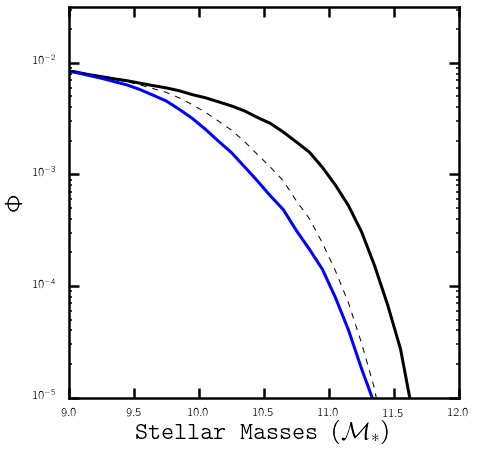

In [67]:
fig = plt.figure(figsize=(7,7))
sub = fig.add_subplot(111)

sub.plot(smf_tot[0], smf_tot[1], c='k', lw=3, label='Total')
sub.plot(smf_truesf[0], smf_truesf[1], c='b', lw=3, label='True SF')
sub.plot(smf_sfclass[0], smf_sfclass[1], c='k', ls='--')

sub.set_xlim([9., 12.])
sub.set_xlabel('Stellar Masses $(\mathcal{M}_*)$', fontsize=25)
sub.set_ylim([1e-5, 10**-1.5])
sub.set_yscale('log')
sub.set_ylabel('$\Phi$', fontsize=25)